# Contour Analysis

In [1]:
!pip install transformations

## Import Libraries

In [2]:
import cv2
import math
import numpy as np 
import pandas as pd
import transformations
import matplotlib.pyplot as plt

## Read Image

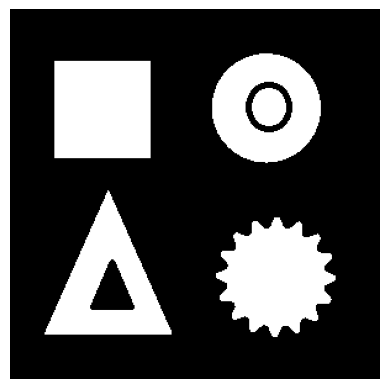

In [3]:
image = cv2.imread("images/shapes.png")

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB));
plt.axis("off");

## Find and Draw Contours

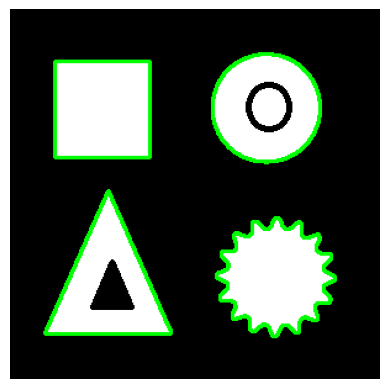

In [4]:
draw_image = image.copy()

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

### Find Contours
contours,hierarchy = cv2.findContours(gray_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

### Draw all Contours
cv2.drawContours(draw_image,contours, -1, (0,255,0),2)

### Display
plt.imshow(draw_image);
plt.axis("off");

### Once Detected They can be further analyzed for thier properties.

## Image Moments

### Function Syntax: 
    retval = cv2.moments(array)
### Parameters:
    array : Single-Channel, 8-bit or floating-point 2D array
### Returns:
    retval : A python dictionary containing different moments properties.

In [5]:
### Select a contour
contour = contours[1]

### Get its moments
M = cv2.moments(contour)

### print all moments
print(M)

{'m00': 5989.0, 'm10': 474646.0, 'm01': 1343253.0, 'm20': 40271627.83333333, 'm11': 106455299.5, 'm02': 305761478.1666666, 'm30': 3612359060.0, 'm21': 9073234845.966667, 'm12': 24231834439.333332, 'm03': 70521711090.90001, 'mu20': 2654525.5932264626, 'mu11': -1481.838787779212, 'mu02': 4487705.91604048, 'mu30': -44842.82609272003, 'mu21': 41079527.165201545, 'mu12': -4197.684742808342, 'mu03': -69584902.00160217, 'nu20': 0.07400793571613253, 'nu11': -4.131353264307356e-05, 'nu02': 0.12511683887874922, 'nu30': -1.615500855213816e-05, 'nu21': 0.014799248185193237, 'nu12': -1.5122515422875585e-06, 'nu03': -0.025068551313229503}


## Find Center of Contour

In [6]:
### Calculate the X-cordinate of the centroid
cx = int(M['m10'] / M['m00'])

### Calculate the Y-cordinate of the centroid
cy = int(M['m01'] / M['m00'])

### Print the centroid point
print(f"Centroid : {cx},{cy}")


Centroid : 79,224


### Now retrieving centroid point for all contours

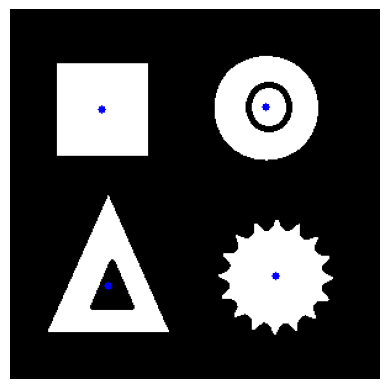

In [7]:
draw_image = image.copy()

for contour in contours:
    M = cv2.moments(contour)
    cx,cy = int(M['m10'] / M['m00']), int(M['m01'] / M['m00'])
    cv2.circle(draw_image,(cx,cy), 3, (0,0,255), -1)
    cv2.drawContours(draw_image,contour,-1,(0,0,0), 2)

plt.imshow(draw_image);
plt.axis("off");

In [8]:
print(len(contours))

4


## Finding Contour Area

In [9]:
contour = contours[1]

### Get Area
area_method1 = cv2.contourArea(contour)

print(f"Area : {area_method1}")

Area : 5989.0


### Another Method

In [10]:
M = cv2.moments(contour)

### Get the moment containing Area
area_method2 = M['m00']

print(f"Area : {area_method2}")

Area : 5989.0


## Contour Properties

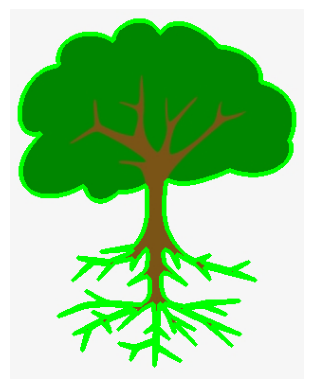

In [11]:
image = cv2.imread("images/tree.png")

### Create a copy
draw_image = image.copy()

### Convert to GrayScale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

### Create a binary threshold
_, binary = cv2.threshold(gray_image, 220,255, cv2.THRESH_BINARY_INV)

### Detect and draw external contour
contours, hierarchy = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

### Select a contour
contour = contours[0]

### Draw the selected contour
cv2.drawContours(draw_image, contour, -1, (0,255,0), 3)

### Dispay the result
plt.imshow(cv2.cvtColor(draw_image,cv2.COLOR_BGR2RGB));
plt.axis("off");

### Now using a custom transform() function from the transform.py module we can convienently apply and display different transformations to an image.

### Function Syntax:
    transformations.transform(translate = True, scale = False, rotate = False, path = "images/tree.png", display = True)

In [12]:
# modified_contour = transformations.transform(rotate = True, display = True)

## Aspect Ratio

In [13]:
### Get the up-right bounding rectangle for the image
x,y,w,h = cv2.boundingRect(contour)

### Aspect Ratio
aspect_ratio = float(w)/h
print(f"Aspect Ratio initially {aspect_ratio}")


Aspect Ratio initially 0.7945205479452054


## Extent

### Extent is ratio of contour area to bounding rectangular area.

In [14]:
### Calculate the area for the contour
original_area = cv2.contourArea(contour)

### Find the bounding rectangle for the contour
x,y,w,h = cv2.boundingRect(contour)

### Calculate the area for the bounding rectangle
rect_area = w*h

### Calculate the extent
extent = float(original_area) / rect_area
print(f"Extent {extent}")

Extent 0.43788379782711384


## Hu Moments

### Hu moments are a set of 7 numbers calculated using the central moments. The first 6 of the Hu moments are invariant to translation,scaling,rotation and reflection. The 7th Hu moment is also invariant to these transformations, except that it changes its sign in case of reflection. Below we will caclulate the HU moments.

In [15]:
### Calcualte Moments
M = cv2.moments(contour)

### Calculate Hu Moments
hu_M = cv2.HuMoments(M)

print(hu_M)

[[ 2.12681128e-01]
 [ 3.74548537e-05]
 [ 1.84036094e-03]
 [ 9.32876234e-04]
 [ 1.13644882e-06]
 [-4.20167534e-06]
 [ 4.50075947e-07]]


### Transforming to log ranges as range for each values are different.

In [16]:
for i in range(len(hu_M)):
    hu_M[i] = -1* math.copysign(1.0, hu_M[i]) * math.log10(abs(hu_M[i]))

df = pd.DataFrame(hu_M,columns=['Hu_Moments of original Image'])
df

,Hu_Moments of original Image
0,0.672271
1,4.426492
2,2.735097
3,3.030176
4,5.944450
5,-5.376578
6,6.346714
